In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

from sklearn.neural_network import MLPClassifier

In [2]:
data = pd.read_csv('./datasets/data.csv')

#  Combining all games with review score < 5
data.loc[data['overall_review'] < 5, 'overall_review'] = 5

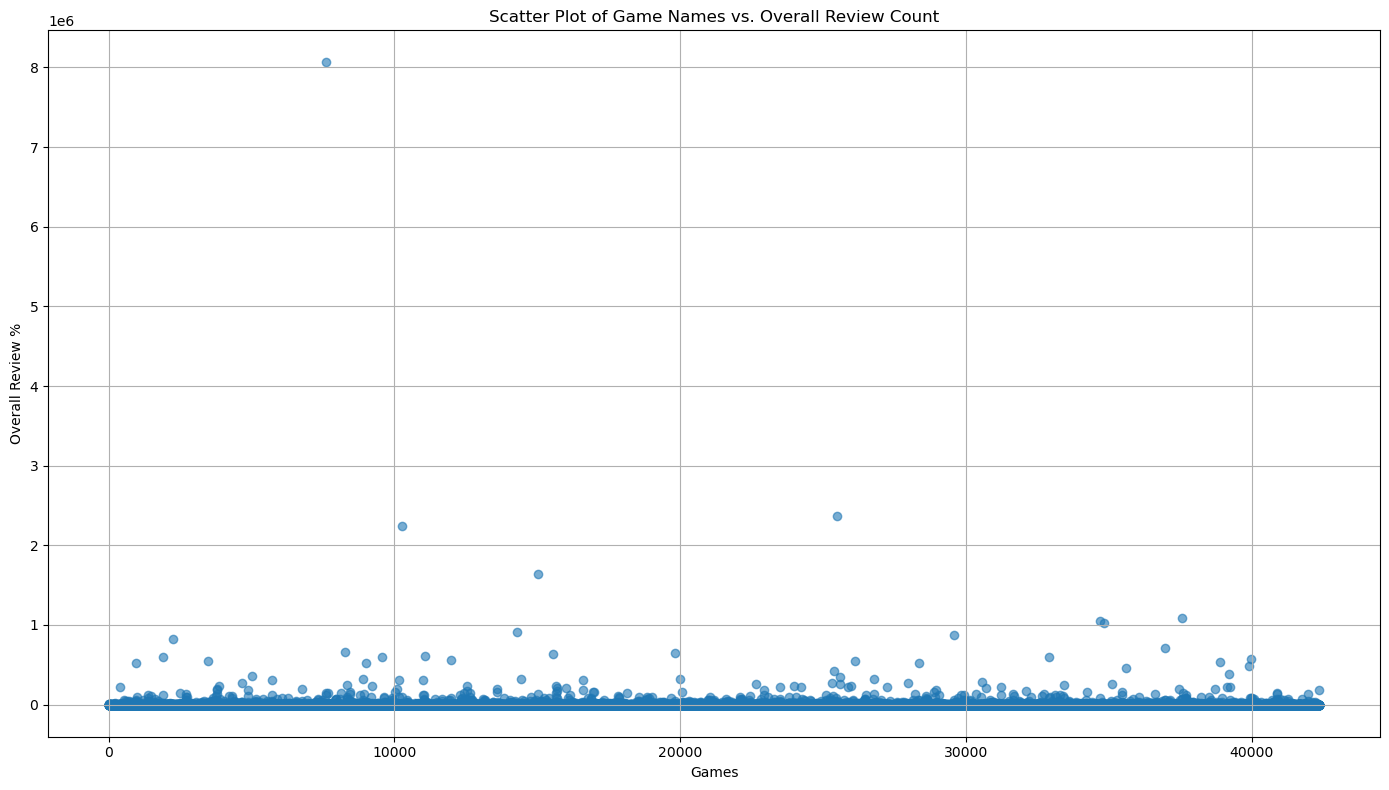

In [3]:
#  Convert Name to a numerical index
data['Name_index'] = data['title'].astype('category').cat.codes

#  Create the scatter plot
plt.figure(figsize=(14, 8))
plt.scatter(data['Name_index'], data['overall_review_count'], alpha=0.6)
plt.xlabel('Games')
plt.ylabel('Overall Review %')
plt.title('Scatter Plot of Game Names vs. Overall Review Count')
plt.grid(True)
plt.tight_layout()
plt.show()
data.drop(columns='Name_index', inplace=True)

In [4]:
# #  Normalizing review count
# max_count = data['overall_review_count'].max()
# min_count = data['overall_review_count'].min()
# data['overall_review_count'] = (data['overall_review_count'] - min_count)/(max_count - min_count)

#  Removing outliners
data = data[data['overall_review_count'] < data['overall_review_count'].max()*0.1]

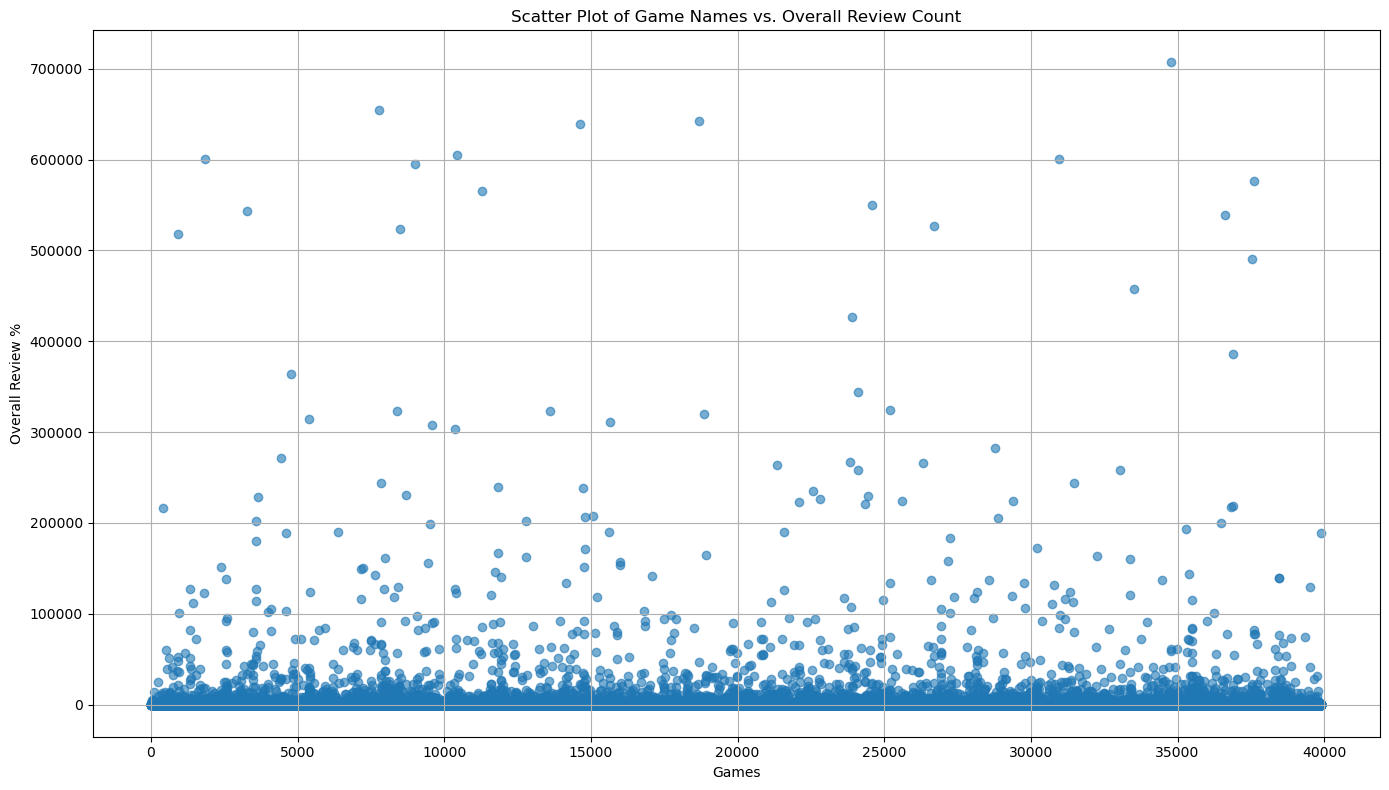

In [5]:
#  Convert Name to a numerical index
data['Name_index'] = data['title'].astype('category').cat.codes

#  Create the scatter plot
plt.figure(figsize=(14, 8))
plt.scatter(data['Name_index'], data['overall_review_count'], alpha=0.6)
plt.xlabel('Games')
plt.ylabel('Overall Review %')
plt.title('Scatter Plot of Game Names vs. Overall Review Count')
plt.grid(True)
plt.tight_layout()
plt.show()
data.drop(columns='Name_index', inplace=True)

In [6]:
#  Combining some of the genres and features together
data['Sports'] = data['Sports'] | data['Racing']

data['Multiplayer'] = data['LAN Multiplayer'] | data['Online Multiplayer']

data.drop(columns=['Racing', 'LAN Multiplayer', 'Online Multiplayer'], inplace=True)
data.to_csv('./datasets/data_final.csv', index=False)

In [7]:
#  Features and target dataframe
X = data.drop(columns=['title', 'overall_review', 'overall_review_%', 'overall_review_count'])
y = data['overall_review'] # Target

#  Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#  Training the model
model = MLPClassifier(hidden_layer_sizes=(64, 32), random_state=42, max_iter=5000)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=5000, random_state=42)

In [9]:
#  Saving the model
import joblib
joblib.dump(model, 'MLPClassifier_model.pkl')

['MLPClassifier_model.pkl']

In [10]:
#  Making predictions
y_pred = model.predict(X_test)

#  Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'accuracy: {acc}')

Mean Squared Error: 2.7535616095976008
R^2 Score: -0.6263446929230032
accuracy: 0.33004248937765557


In [11]:
# Print actual vs predicted values for comparison
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.tail(15))

       Actual  Predicted
30620     7.0        7.0
26209     7.0        7.0
29926     7.0        9.0
9674      8.0        9.0
25929     6.0        6.0
3546      9.0        9.0
15270     8.0        6.0
21106     7.0        9.0
33972     6.0        6.0
32712     6.0        7.0
13839     9.0        9.0
38848     5.0        9.0
38544     6.0        6.0
32288     6.0        9.0
29508     7.0        7.0


In [12]:
comparison_df.describe()

,Actual,Predicted
count,8002.000000,8002.000000
mean,7.528118,7.689328
std,1.301272,1.240672
min,5.000000,5.000000
25%,6.000000,7.000000
50%,7.000000,7.000000
75%,9.000000,9.000000
max,10.000000,10.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40010 entries, 2 to 42248
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       40010 non-null  object 
 1   win_support                 40010 non-null  bool   
 2   mac_support                 40010 non-null  bool   
 3   linux_support               40010 non-null  bool   
 4   overall_review              40010 non-null  float64
 5   overall_review_%            40010 non-null  float64
 6   overall_review_count        40010 non-null  float64
 7   Single-player               40010 non-null  bool   
 8   Cross-Platform Multiplayer  40010 non-null  bool   
 9   VR Supported                40010 non-null  bool   
 10  Indie                       40010 non-null  bool   
 11  Action                      40010 non-null  bool   
 12  Adventure                   40010 non-null  bool   
 13  Casual                      40010 no